# Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Change datatype of columns to the appripriate ones
import pre_processing as prep
import statsmodels.formula.api as smf





Upload the data into the notebook

In [2]:
df = pd.read_csv("./impute_loan_payments")

In [3]:
df_p = prep.DataTransform(df)

Convert the columns to their correct data type

In [4]:
# Transform columns into the categorical data type
df_p.category_transform(["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "application_type", "employment_length", "policy_code"])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.000000,0.00,0.00,2021-10-01,12850.16,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.000000,0.00,0.00,2021-06-01,13899.67,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.000000,0.00,0.00,2016-07-01,160.61,2022-02-01,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,104.942381,0.00,0.00,2016-10-01,490.01,2022-02-01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.000000,0.00,0.00,2014-03-01,0.00,2022-02-01,2013-05-01,0.0,1,INDIVIDUAL


In [5]:
# Convert columns to date type data
df_p.date_transform(["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.000000,0.00,0.00,2021-10-01,12850.16,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.000000,0.00,0.00,2021-06-01,13899.67,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.000000,0.00,0.00,2016-07-01,160.61,2022-02-01,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,104.942381,0.00,0.00,2016-10-01,490.01,2022-02-01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.000000,0.00,0.00,2014-03-01,0.00,2022-02-01,2013-05-01,0.0,1,INDIVIDUAL


Convert all sub categories into the main ones. 

In [6]:
df["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid", "Fully Paid", inplace=True)
df["loan_status"].replace("Does not meet the credit policy. Status:Charged Off", "Charged Off", inplace=True)
df["loan_status"].replace("Late (31-120 days)", "Late", inplace=True)
df["loan_status"].replace("Late (16-30 days)", "Late", inplace=True)

# Current state of the loan

#### Calculate the percentage of the loans recovered against the investor funding

In [7]:
round(df["total_payment"].sum()/df["funded_amount_inv"].sum()*100, 2)


93.26

Create a dataframe to veisualise the percentage and visualise it using seaborn.

In [8]:
df_inv = pd.DataFrame({"Type": "Loans", 
                       "Funded_by_investors":[df["funded_amount_inv"].sum()/df["funded_amount_inv"].sum()*100], 
                       "Repaid":[df["total_payment"].sum()/df["funded_amount_inv"].sum()*100]})

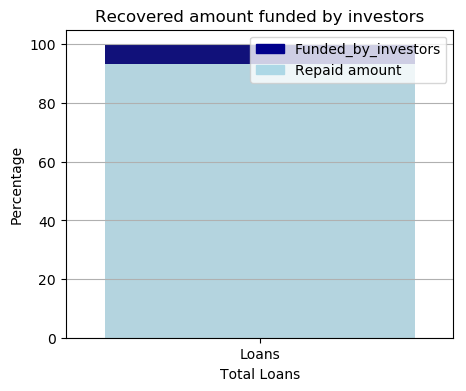

In [9]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Funded_by_investors", data=df_inv, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_inv, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount funded by investors")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculate the percentage of the loans  recovered against the total amount funded

In [10]:
round(df["total_payment"].sum()/df["funded_amount"].sum()*100)


92

In [11]:
df_funded= pd.DataFrame({"Type": "Loans", 
                       "Total_funded":[df["funded_amount"].sum()/df["funded_amount"].sum()*100], 
                       "Repaid":[df["total_payment"].sum()/df["funded_amount"].sum().sum()*100]})

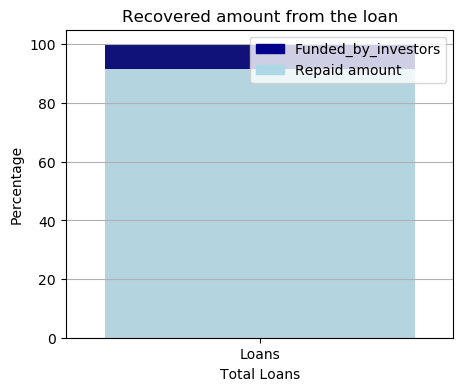

In [12]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Total_funded", data=df_funded, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_funded, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount from the loan")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculate th percentage of the total amount would be recovered up to 6 months' in the future.

Calculate the number of months that the clients are left to pay.

In [13]:
# Get the number of months alrady paid
df["remaining_monhts_to_pay"] = df["term_in_months"] - round((df["last_payment_date"] - df["issue_date"])/np.timedelta64(1, 'M'),)

Convert any nagative values to zero.

In [14]:

# turn any negative values to 0
df["remaining_monhts_to_pay"] = df["remaining_monhts_to_pay"].clip(lower=0)

Calculate the total payments that the cleitns still owe.

In [15]:
# Amount paid in 6 months
df["projection"] = df["remaining_monhts_to_pay"] * df["instalment"]

Replace nulls for 0.

In [16]:
# Rremove nulls
df["projection"] = df["projection"].fillna(0.0)

Filter the date for rows that still have 6 or less months to pay.

In [17]:
df_6months = df[df["remaining_monhts_to_pay"]<=6]

Calculate the percentage recoved of the toatal loan amount on the next 6 months.

In [18]:
df_6months["projection"].sum()/df["funded_amount"].sum()*100

0.4030991938905983

Create a datafraem to visualise it.

In [19]:
df_projection= pd.DataFrame({"Type": "Loans", 
                       "Total_funded":[df["funded_amount"].sum()/df["funded_amount"].sum()*100], 
                       "Repaid":[df_6months["projection"].sum()/df["funded_amount"].sum().sum()*100]})

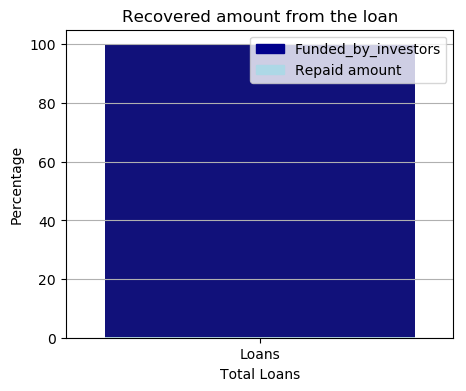

In [20]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Total_funded", data=df_projection, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_projection, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount from the loan")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculating loss

Calculate number of mohts alrady paid

In [21]:
df_c_o = df[df["loan_status"] == "Charged Off"]
df_cha_ff=df_c_o.copy(deep=True)

Calculate the percentage of loans that had been charged off

In [22]:
round(len(df_cha_ff)/len(df[df["loan_status"] != "Charged Off"])*100)

12

Calculate percentange clients paid before the loan became charged off.

In [23]:
amount_paid = round(df_cha_ff["total_payment"].sum(), 2)
percentage_paid = round((df_cha_ff["total_payment"].sum()/df_cha_ff["loan_amount"].sum())*100,)


print(f"The total amount of loans paid by the clients before being charged off was {amount_paid}, which was {percentage_paid}% of the total funded amount of those loans.")

The total amount of loans paid by the clients before being charged off was 39247128.38, which was 49% of the total funded amount of those loans.


#### Calculating projected loss 

Calculate the total payment that would have recived from the loan rather than using the loan amount given to the client, since this amount will not reflect the revenue gain through inetrest rates. This can be calculated by multiplying the remaining months to pay by the instalment amount and then adding the results to the total payment made to date.

In [24]:
# This expected amount takes into account the interest gained
df_cha_ff["expected_amount"] = df_cha_ff["total_payment"] + df_cha_ff["projection"]


To calculate loss the amount paid until the last date will be subtracted from the total payment that the client should had made

In [25]:
per_rev_loss = round(df_cha_ff["projection"].sum()/df_cha_ff["expected_amount"].sum()*100)
per_rev_loss

64

In [26]:
df_p_l= pd.DataFrame({"Type": "Loans", 
                       "Expected_amount": [df_cha_ff["expected_amount"].sum()], 
                       "Loss":[df_cha_ff["projection"].sum()]})

df_p_l

,Type,Expected_amount,Loss
0,Loans,1.095922e+08,70345036.03


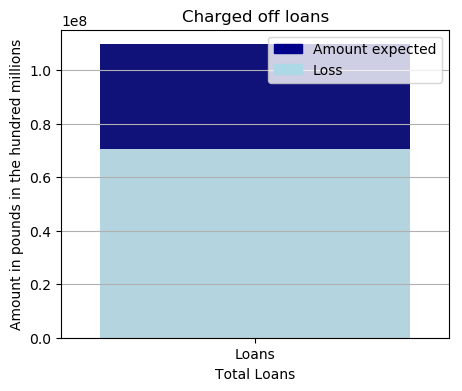

In [27]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Expected_amount", data=df_p_l, color='darkblue')
bar2 = sns.barplot(x="Type", y="Loss", data=df_p_l, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Amount expected')
bottom_bar = mpatches.Patch(color='lightblue', label='Loss')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Charged off loans")
plt.ylabel("Amount in pounds in the hundred millions")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Possible loss

What percentage the loans are made off by clients that are behind their loan payments

In [28]:
# Filter for clients with late fees
df_late = df[df["loan_status"] == "Late"]

# use number of rows in datafrmes to calculate the percentages
per_late = round(len(df_late)/len(df)*100)

print(f"The percentage of of loans made up by clients who had pay late is {per_late}%.")

The percentage of of loans made up by clients who had pay late is 1%.


How many costumers are behind their loan payments

In [29]:
n_late_payments= len(df_late)
print(f"There are {n_late_payments} clients who had been late in their loan payments.")

There are 686 clients who had been late in their loan payments.


Calculate the loss if these costumers loans became charged off 

In [30]:
# Subtract the total payments made by the clients from the total loan amounts
loss_left_loan = round(df_late["loan_amount"].sum() - df_late["total_payment"].sum(), 2)
print(f"The company will loose £{loss_left_loan} if the clients with late loan payments become charged off.")

The company will loose £3408775.05 if the clients with late loan payments become charged off.


Calculate how much loss if costumer would have complete all of their payments

In [31]:
loss_pred_charged_if_off = round(df_late["projection"].sum(), 2)
print(f"The company will loose £{loss_pred_charged_if_off } from the remainder of the late payment loans if they become charged off.")

The company will loose £7130865.47 from the remainder of the late payment loans if they become charged off.


 What percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [32]:
default_loans = df[df["loan_status"] == "Default"]

In [33]:
# Calculate total expected revenue
total_ex_rev = df["projection"].sum()
off_late = df_late["projection"].sum() + default_loans["projection"].sum()


per_rev_offlate = round(off_late/total_ex_rev*100) 


print(f"The percentage of total expected revenue made of clients which loans have default and from those with late fees if there were chage to default would be {per_rev_offlate}%")


The percentage of total expected revenue made of clients which loans have default and from those with late fees if there were chage to default would be 2%


In [34]:
df["loan_status"].value_counts()

Fully Paid         28021
Current            19268
Charged Off         5939
Late                 686
In Grace Period      265
Default               52
Name: loan_status, dtype: int64

#### Possible loss

Generated a correlation matrix to see which column are correlated with late fee and charged off.

 - Loan amaount
 - Interest rates
 - Grade
 - Employment lenght
 - Home ownership
 - Annual income
 - Purpose
 - Total accounts
 
 The policy, application type and payment plant will not be considered since all the data point in them have the same value except for payment plant which only on data point is different.


##### Loan amounts

Visualise the relationship beteween loan amounst and lount status.

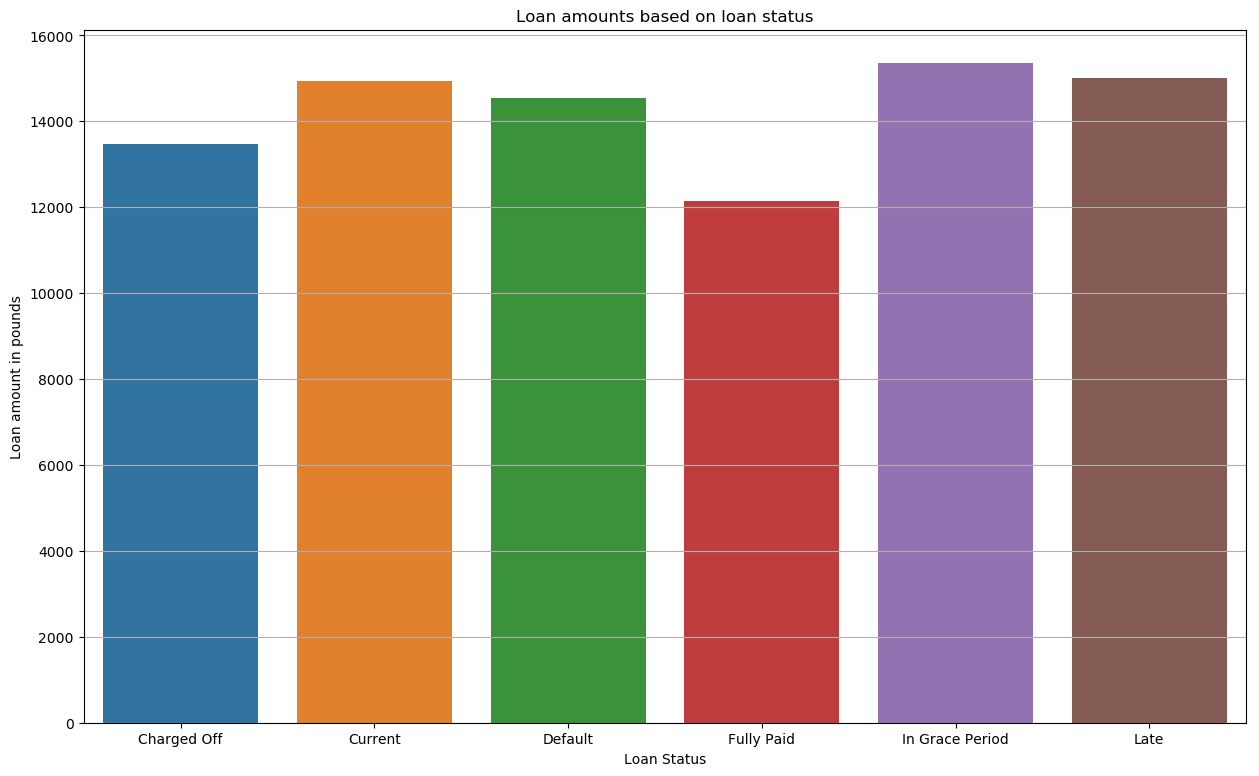

In [35]:
plt.figure(figsize=(15, 9))
barloan_stat = sns.barplot(data=df, x="loan_status", y="loan_amount", ci=None)
plt.title("Loan amounts based on loan status")
plt.xlabel("Loan Status")
plt.ylabel("Loan amount in pounds") 
plt.grid(True, axis="y") 
plt.show()


From the above barchart we can see that loan amount for charged off loasn are around £13,000 while all the rest are above £14,000 except for fully paid loans wihc are sliglty above £12,000. From this we can speculate that:
- loans below £12,100 will be paid offvloans 
- loans of £13,000 will be charged off
- Loans of £14,500 clients will incurr late payments or client wil stiil be paying them.
- Loans  of £14,300 will be defaulted

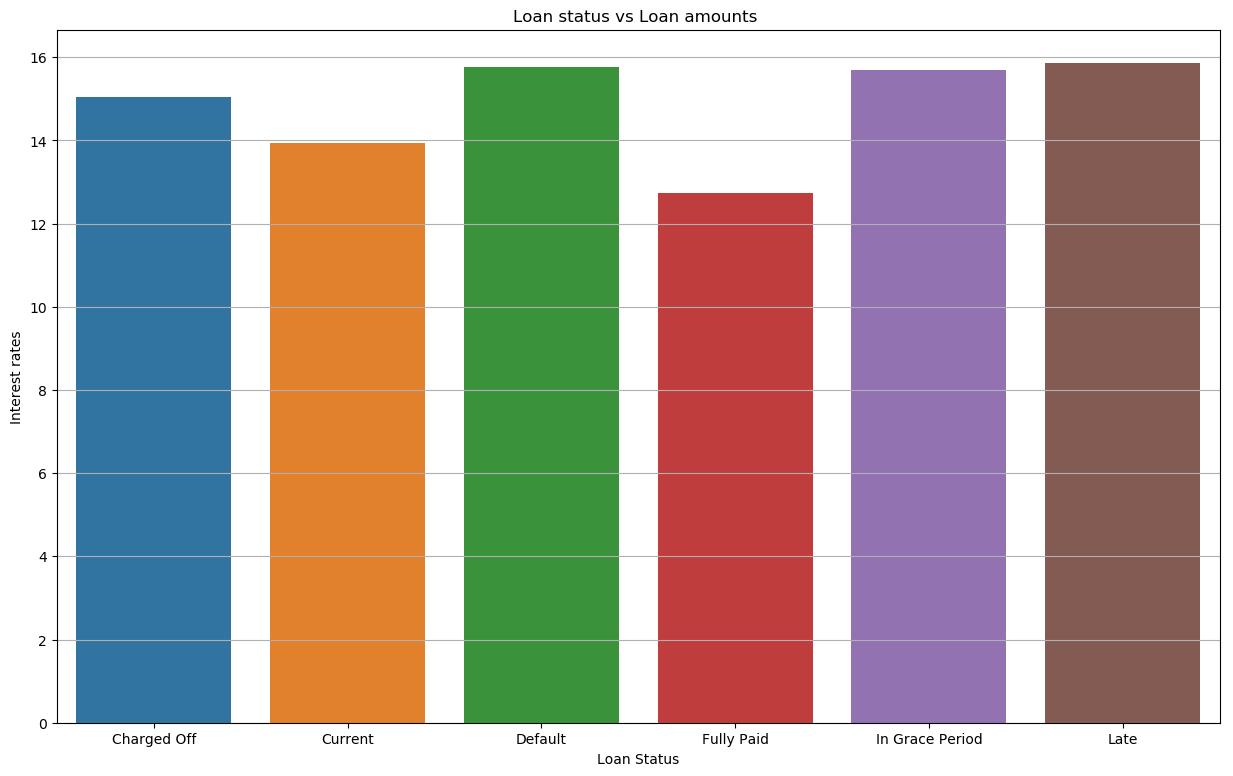

In [36]:
plt.figure(figsize=(15, 9))
barloan_stat = sns.barplot(data=df, x="loan_status", y="int_rate", ci=None)
plt.title("Loan status vs Loan amounts ")
plt.xlabel("Loan Status")
plt.ylabel("Interest rates") 
plt.grid(True, axis="y") 
plt.show()

The above barchart shows:
- Charged off loans have an interest rate of 15.
- Default loans have an interest rate around 15.7
- Late loans have an interest rate around 15.9
- Paid loans have a interest rate of around 12.5

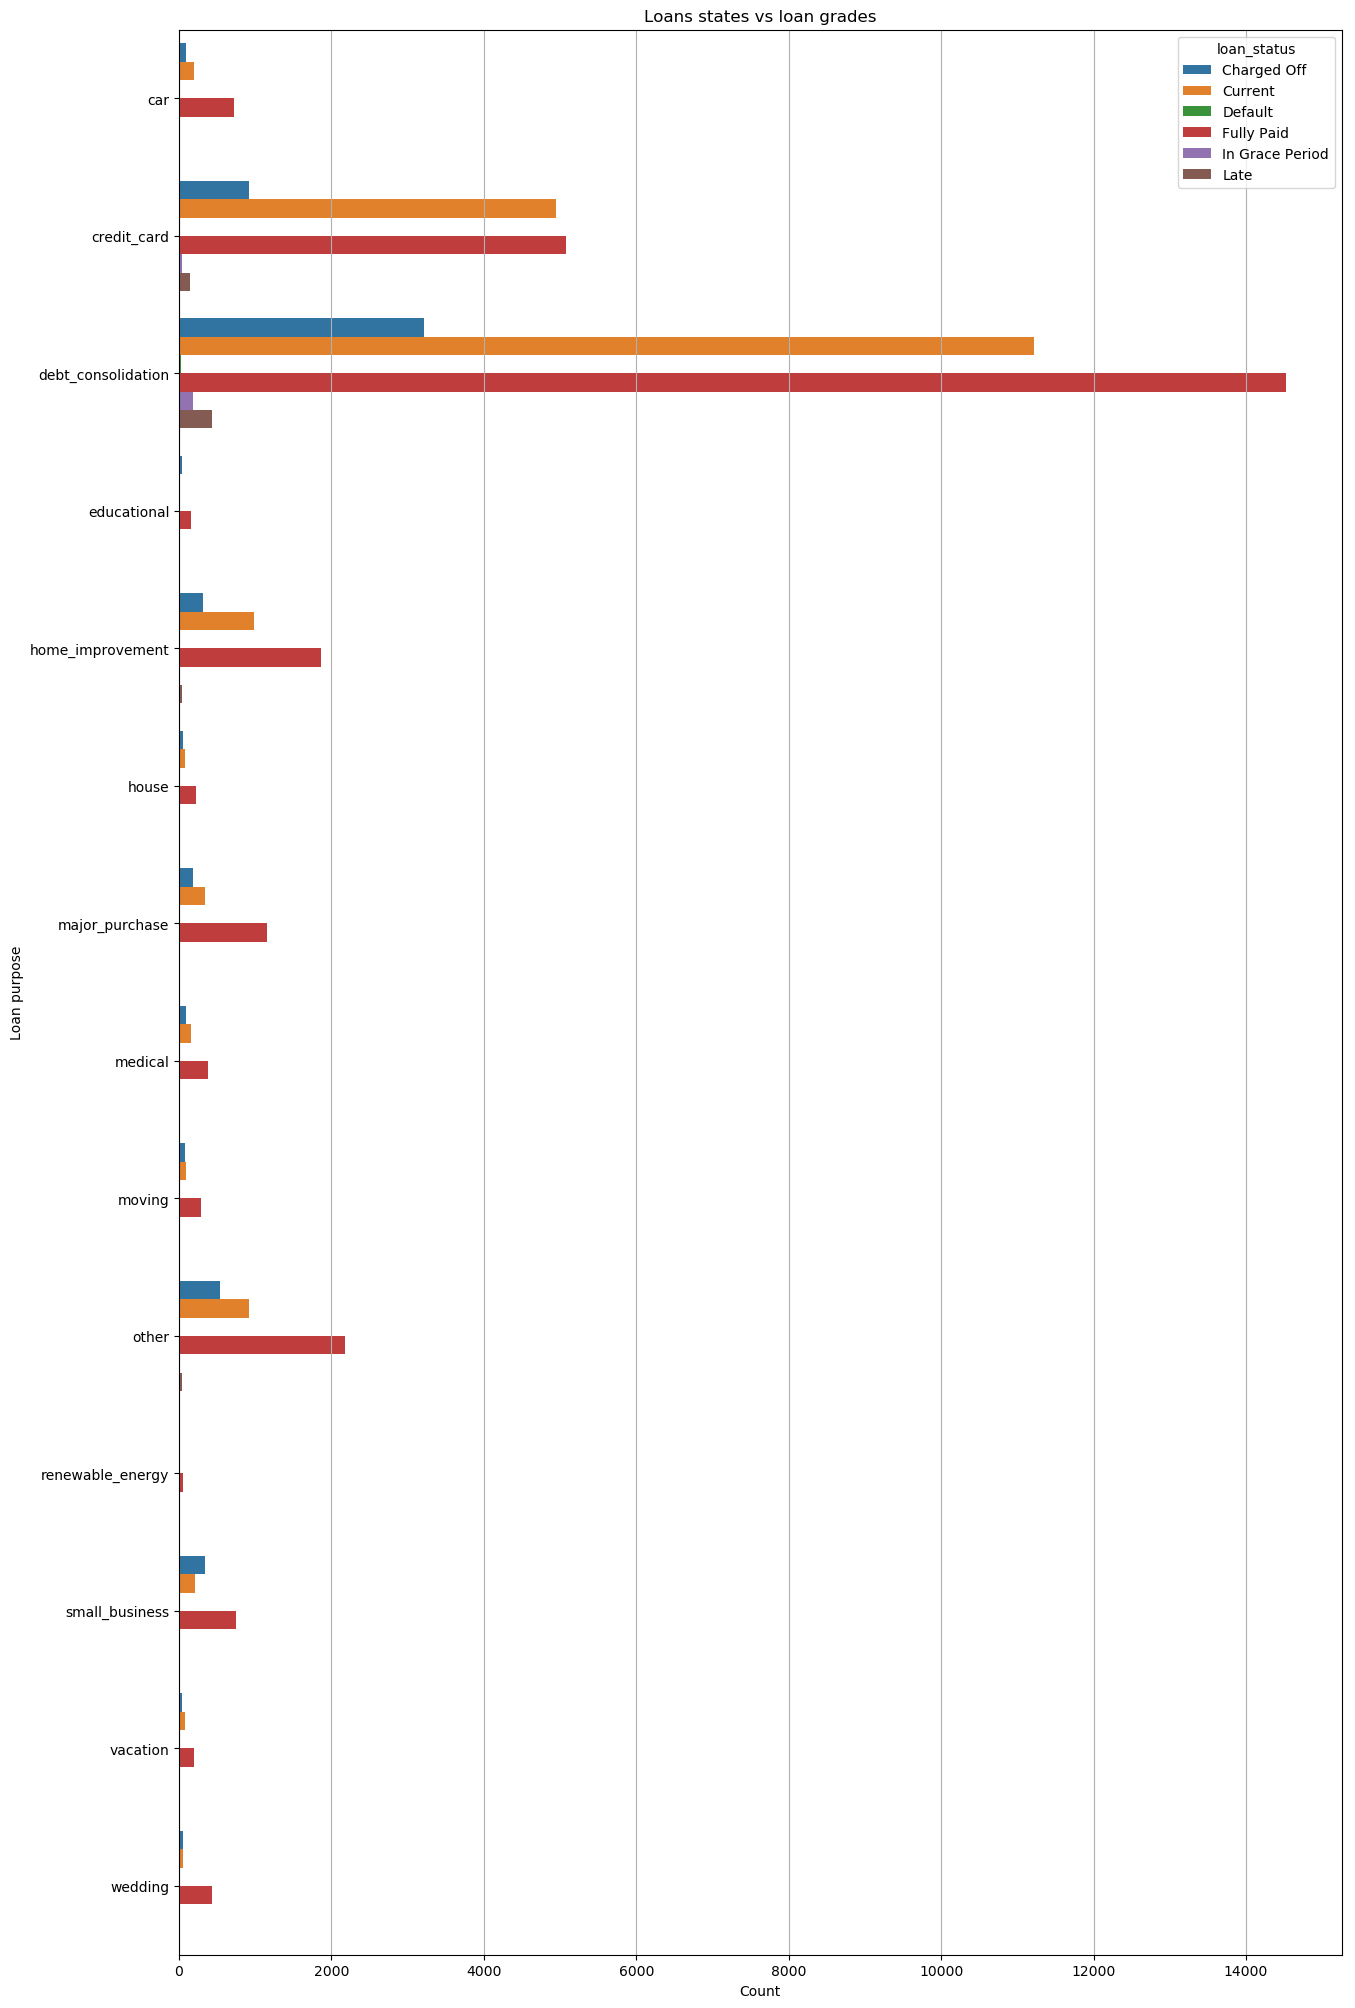

In [37]:
plt.figure(figsize=(15, 25))
sns.countplot(y=df["purpose"], hue=df["loan_status"])
plt.title("Loans states vs loan grades")
plt.xlabel("Count")
plt.ylabel("Loan purpose") 
plt.grid(True, axis="x") 
plt.show()

From the above barplot we can see that fully paid has the highest count in all.
Overall order in most categories based on counts:
- Paid
- Current
- Charged off
- Late
- Grace Period

However, in the small business charged off loan have the second highest count, while late loans are have the foruth hiher count in most catgories. Categories wiht higher count of charged off loand include: debt consolidation, credit card, other and small business, while for late loans are: debt consolidation and credit card.

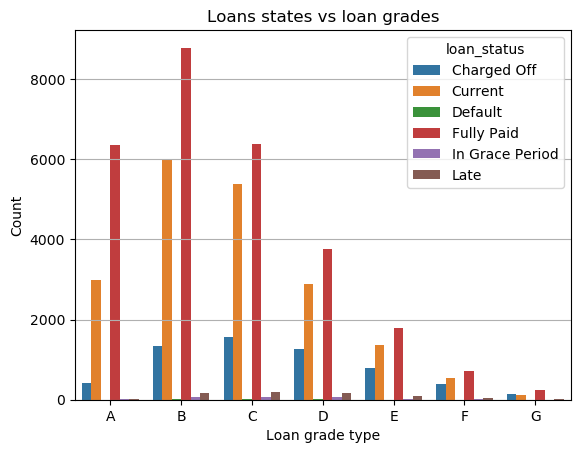

In [38]:
sns.countplot(x=df["grade"], hue=df["loan_status"])
plt.title("Loans states vs loan grades")
plt.xlabel("Loan grade type")
plt.ylabel("Count") 
plt.grid(True, axis="y") 
plt.show()

From the above barchart we can see  fully pad loans have the higshest count followed by current, charged off,  late and then grece period. Charged off loans are more numerous in loan garde B,C and D while late loans on B, C, D. However, charged off loans become the decond highest in grade G.

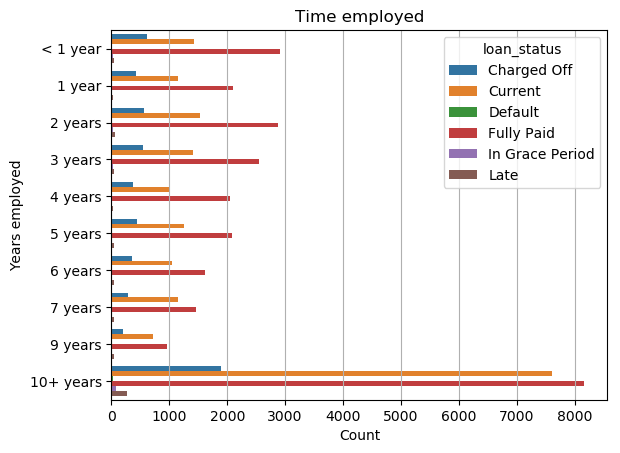

In [39]:
plot_employed_order = ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years",
                       "6 years", "7 years", "9 years", "10+ years"]
sns.countplot(y=df["employment_length"], hue=df["loan_status"], order=plot_employed_order)
plt.title("Time employed")
plt.xlabel("Count")
plt.ylabel("Years employed") 
plt.grid(True, axis="x") 
plt.show()

From the above barplot we can see that as time employed increases  charged of loans tend to degres, while late loans remain mostly the same, except for the 10+ years category, in which charged and late loans are the hisghest comapre to the other categories.

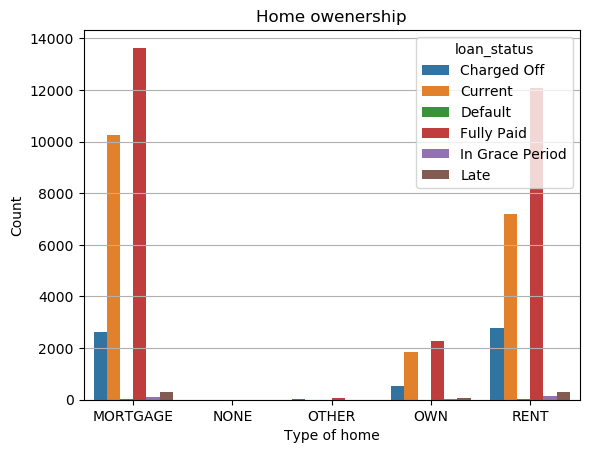

In [40]:
sns.countplot(x=df["home_ownership"], hue=df["loan_status"])
plt.title("Home owenership")
plt.xlabel("Type of home")
plt.ylabel("Count") 
plt.grid(True, axis="y") 
plt.show()

- Clients with charged off and late loans are more prominent in mortgage and rent homes.

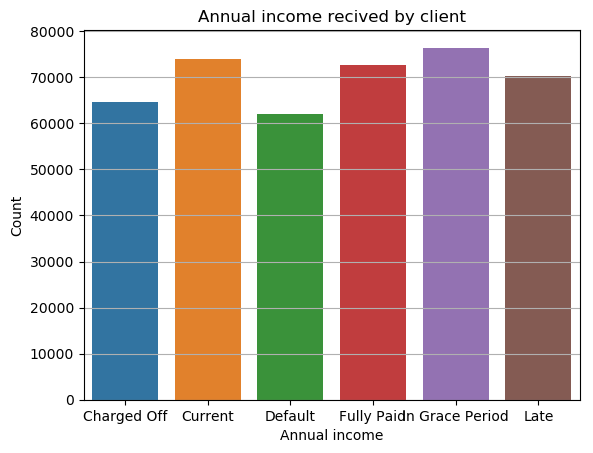

In [41]:
sns.barplot(y=df["annual_inc"], x=df["loan_status"], ci=None)
plt.title("Annual income recived by client")
plt.xlabel("Annual income")
plt.ylabel("Count") 
plt.grid(True, axis="y") 
plt.show()

- Clients with default loans status have the lowets annual income at approximately £60,300.
- Clients with charged off loans status have the second lowest income at  approximately £60,500.
- Clients with late loan payment status have an annual income of around £70,000.

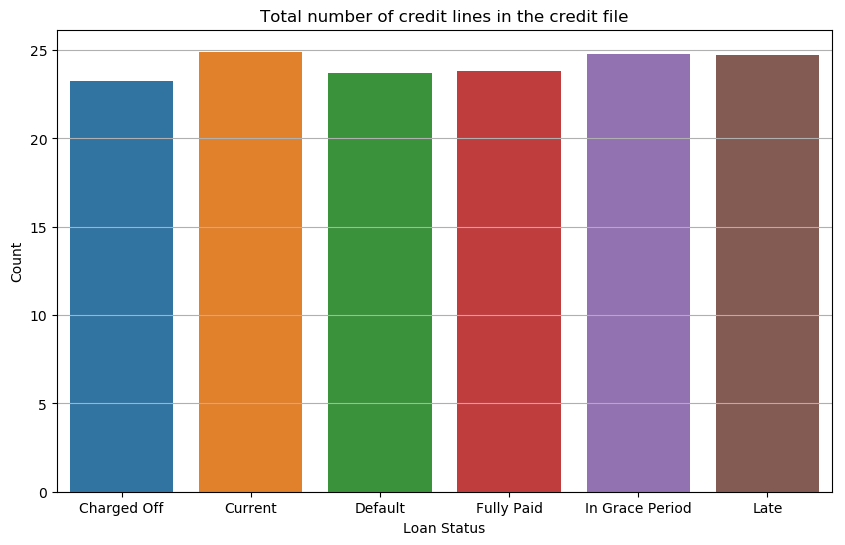

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df["total_accounts"], x=df["loan_status"], ci=None)
plt.title("Total number of credit lines in the credit file")
plt.xlabel("Loan Status")
plt.ylabel("Count") 
plt.grid(True, axis="y") 
plt.show()

- Clients wiht charged off loan status have around 23 total credit lines open.
- Clients wiht late loan status have around 24.5 total credit lines open.
- Clients wiht dafaulted off loan status have around 24 total credit lines open.

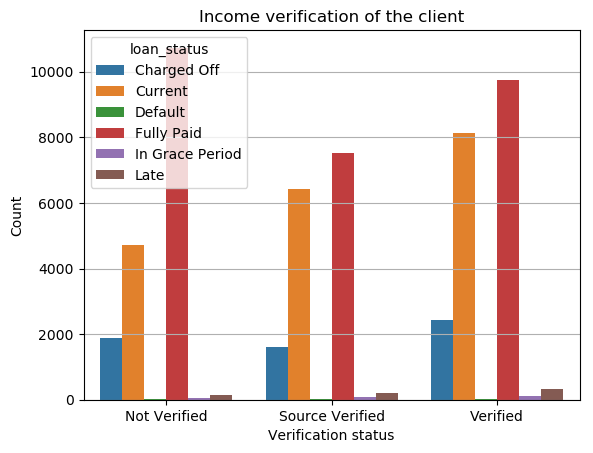

In [43]:
sns.countplot(x=df["verification_status"], hue=df["loan_status"])
plt.title("Income verification of the client")
plt.xlabel("Verification status")
plt.ylabel("Count") 
plt.grid(True, axis="y") 
plt.show()

- Aroud 2,200 clients with a charged off loan status have their income verified.
- Around 1,900 clients with a charged off loan status have their income not verified
- Clients wiht a late loan status only have small changes in the portaion of the income verification category.

Based on the previous visualisation, the following profiles were created:

Charged off 
- Loan amount: ~£13,000
- Interest rate: ~15
- Purpose: Debt consolidation, credit card, other, small business
- Grade: B, C, D and G 
- Employment: 10+ year
- Annual income: ~£60,400
- Total credit lines open: 23


Late
- Loan amount: ~£14,500
- Interest rate: ~15.9
- Purpose: Debt consolidation, credit card
- Grade: B, C, and D 
- Employment: 10+ year
- Annual income: ~£70,000
- Total credit lines open: 24.5

Based on these profile, in my opinion the numerical variables are better at differenciating between loas status charged off and late. These terms can then be used to create several logistic regresion models to undertand how accurate they are and to see individually which of them is the best at predicting.